In [36]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

In [86]:
def get_data():
    data_dir = 'data/id-documents-zone-1/'

    transform = transforms.Compose([
                    transforms.Resize(128),
                    transforms.ToTensor()])

    train_set = datasets.ImageFolder(data_dir + '/training_set', transform=transform)
    test_set = datasets.ImageFolder(data_dir + '/test_set', transform=transform)

    train = DataLoader(train_set, batch_size=32, shuffle=True)
    test = DataLoader(test_set, batch_size=32, shuffle=True)
    
    return train, test


torch.Size([3, 128, 294])
torch.Size([3, 128, 294])
torch.Size([3, 128, 294])
torch.Size([3, 128, 294])
torch.Size([3, 128, 294])


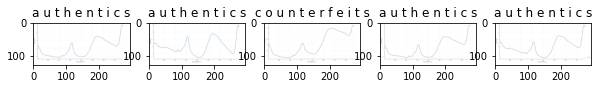

images shape on batch size = torch.Size([11, 3, 128, 294])
labels shape on batch size = torch.Size([11])


In [87]:
def train_imshow():
    classes = ('authentics', 'counterfeits')
    dataiter = iter(train)
    images, labels = dataiter.next()
    fig, axes = plt.subplots(figsize=(10, 4), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0))  # permute?
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
        print(images[i].shape)  # Not needed
    plt.show()
    print('images shape on batch size = {}'.format(images.size()))
    print('labels shape on batch size = {}'.format(labels.size()))


train, test = get_data()


train_imshow()

In [114]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(8, 8)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(64, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 64)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)



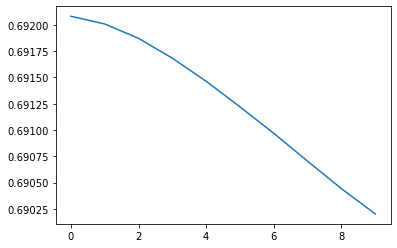

Finished Training


In [115]:
def train_net(n_epoch):
    losses = []
    for epoch in range(n_epoch):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            losses.append(loss)
            running_loss += loss.item()
            if i % 100 == 99:  # print every 2000 mini-batches
                print('[%d, %5d] loss: %.10f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    losses= [loss.detach().numpy() for loss in losses]
    plt.plot(losses, label='Training loss')
    plt.show()
    print('Finished Training')

train_net(10)

In [119]:
correct = 0
total = 0
with torch.no_grad():
    for data in test:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(str(predicted) + ' ' + str(labels))

print('Accuracy of the network on the %d test images: %d %%' % (len(test),
    100 * correct / total))

tensor([0, 0, 0, 0, 0, 0, 0]) tensor([1, 1, 0, 0, 0, 0, 1])
Accuracy of the network on the 1 test images: 57 %
